# Proyecto EDA

### Análisis Multivariante

4) Copia de la Base de Datos

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar la base de datos
file_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\data\Netflix_Movies_and_TV_Shows_cleaned.csv"
netflix_data = pd.read_csv(file_path)

# Crear una copia de la base de datos
data = netflix_data.copy()

# Mostrar las primeras filas para confirmar
print("Primeras 20 filas de la copia:")
print(data.head(20))

Primeras 20 filas de la copia:
       Title     Type        Genre  Release Year Rating  Duration  \
0    Title 1  TV Show       Comedy          1955     PG      1800   
1    Title 2  TV Show       Horror          2020      G      1800   
2    Title 3  TV Show       Action          1966  TV-PG       140   
3    Title 4    Movie     Thriller          2011  PG-13       141   
4    Title 5  TV Show      Romance          1959  TV-14       172   
5    Title 6    Movie       Action          2007  PG-13       141   
6    Title 7    Movie      Romance          1977  TV-14        68   
7    Title 8    Movie       Comedy          1971  TV-PG       104   
8    Title 9    Movie        Drama          2000  PG-13       141   
9   Title 10    Movie     Thriller          1975  TV-MA       141   
10  Title 11  TV Show      Romance          2021  TV-14       139   
11  Title 12  TV Show       Action          1986  PG-13        85   
12  Title 13    Movie  Documentary          1997      R       129   
13 

4.1) Gráficos

4.1.1) Heatmap de correlación

El heatmap muestra gráficamente las correlaciones entre variables numéricas.

              Duration  Release Year
Duration       1.00000      -0.02809
Release Year  -0.02809       1.00000


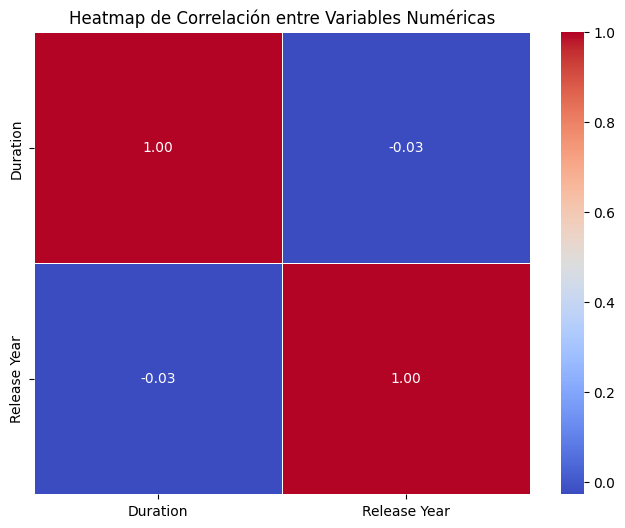

In [2]:
# Seleccionar solo variables numéricas
numerical_data = data[['Duration', 'Release Year']]

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

# Visualizar la matriz de correlación como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables Numéricas")

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Multivariante_Heatmap_Correlacion.png"
plt.savefig(output_path)
plt.show()


Columna Duration:

- Mostrará cómo se correlaciona Duration con Release Year.
- Por ejemplo: Si se ve un valor bajo, como 0.1 o -0.1, significa que no hay una fuerte correlación entre la duración de una película/serie y el año de lanzamiento.

Columna Release Year:

- Permite comprobar si el año de lanzamiento tiene alguna relación lineal con otras variables numéricas, como Duration.

La correlación será baja entre Duration y Release Year, porque el año de lanzamiento no necesariamente influye en la duración de un título.


4.1.2) Grid de gráficas mediante pairplot

Gráficos de dispersión y distribuciones para observar las relaciones entre todas las variables numéricas.

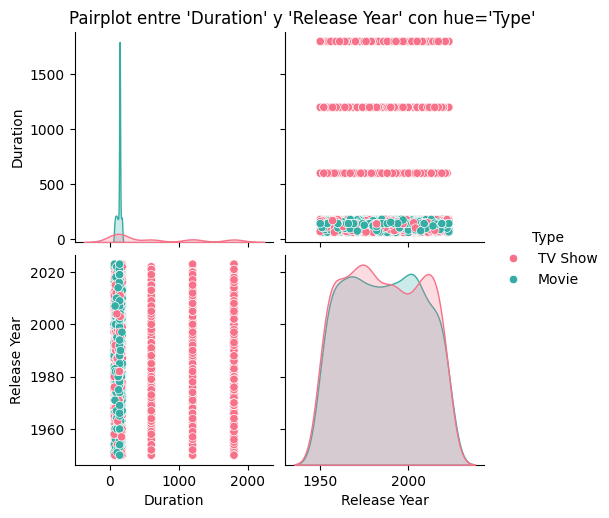

In [3]:
# Pairplot para ver las relaciones entre todas las variables
sns.pairplot(data=data, vars=['Duration', 'Release Year'], hue='Type', palette='husl', diag_kind='kde')
plt.suptitle("Pairplot entre 'Duration' y 'Release Year' con hue='Type'", y=1.02)

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Multivariante_Pairplot.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()

Muestra una matriz de gráficos con lo siguiente:

- Gráficos de dispersión entre las variables numéricas.
- Distribución individual de cada variable numérica en la diagonal.
- Diferenciación por colores en función de una variable categórica, en este caso Type (Movies vs TV Shows).

4.1.3) Guardar Imagenes en Modo Collage

In [4]:
from PIL import Image

# Rutas de las imágenes 
img_paths = [
    r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Multivariante_Heatmap_Correlacion.png",
    r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Multivariante_Pairplot.png"
]

# Cargar las imágenes
images = [Image.open(img) for img in img_paths]

# Determinar el tamaño del lienzo para la imagen combinada (1x2)
width, height = images[0].size  # Asumimos que ambas imágenes tienen el mismo tamaño
combined_width = width * 2
combined_height = height

# Crear un nuevo lienzo en blanco
combined_image = Image.new("RGB", (combined_width, combined_height), color="white")

# Pegar cada imagen en su posición 
combined_image.paste(images[0], (0, 0))                  # Izquierda
combined_image.paste(images[1], (width, 0))              # Derecha

# Guardar la imagen combinada
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Multivariante_Graficos_Combinados.png"
combined_image.save(output_path)

# Confirmación
print(f"Imagen combinada guardada en: {output_path}")
combined_image.show()  # Mostrar la imagen combinada (opcional)


Imagen combinada guardada en: C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Multivariante_Graficos_Combinados.png
